<a href="https://colab.research.google.com/github/erickburcy/practica3-ctg/blob/main/notebooks/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 3 – Análisis Exploratorio y Librería de Visualización (CTG)

En este notebook se muestra el uso de la librería `ctg_viz` desarrollada para:

- Preprocesamiento de datos (nulos y outliers).
- Cálculo de completitud y tipos de variables.
- Generación de gráficas para el conjunto de datos CTG.

El flujo general será:

1. Carga de datos.
2. Preprocesamiento.
3. Análisis de completitud.
4. Visualizaciones exploratorias.
5. Comentarios y conclusiones.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os, sys

PRACTICA_ROOT = "/content/drive/MyDrive/Diplomado/Modulo_1/Practica_3"


# Aseguramos que el proyecto esté en el path
if PRACTICA_ROOT not in sys.path:
    sys.path.append(PRACTICA_ROOT)

PRACTICA_ROOT


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/Diplomado/Modulo_1/Practica_3'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ctg_viz import (
    drop_high_null_columns,
    impute_missing_simple,
    impute_missing_knn,
    detect_outliers_iqr,
    detect_outliers_zscore,
    cap_outliers_iqr,
    classify_numeric_columns,
    check_data_completeness_Erick_Burciaga,  # recuerda renombrarla luego con tu nombre
)
from ctg_viz import plots

# Configuración estética básica
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


## 1. Carga del dataset CTG y exploración inicial

En esta sección se carga el conjunto de datos `CTG.csv` y se realiza una
exploración básica para entender su estructura:

- Número de filas y columnas.
- Tipos de datos.
- Porcentaje de valores nulos por columna.


In [3]:
#Ruta
csv_path = "/content/drive/MyDrive/Diplomado/Modulo_1/Practica_3/Datos/CTG.csv"
# Carga del dataset
df = pd.read_csv(csv_path)

print("Shape original del DataFrame:", df.shape)
display(df.head())

print("\nInformación del DataFrame:")
print(df.info())

print("\nPorcentaje de nulos por columna:")
null_percentage = df.isna().mean().sort_values(ascending=False)
display(null_percentage)


Shape original del DataFrame: (2129, 40)


,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FileName  2126 non-null   object 
 1   Date      2126 non-null   object 
 2   SegFile   2126 non-null   object 
 3   b         2126 non-null   float64
 4   e         2126 non-null   float64
 5   LBE       2126 non-null   float64
 6   LB        2126 non-null   float64
 7   AC        2126 non-null   float64
 8   FM        2127 non-null   float64
 9   UC        2127 non-null   float64
 10  ASTV      2127 non-null   float64
 11  MSTV      2127 non-null   float64
 12  ALTV      2127 non-null   float64
 13  MLTV      2127 non-null   float64
 14  DL        2128 non-null   float64
 15  DS        2128 non-null   float64
 16  DP        2128 non-null   float64
 17  DR        2128 non-null   float64
 18  Width     2126 non-null   float64
 19  Min       2126 non-null   float64
 20  Ma

,0
FileName,0.001409
Date,0.001409
SegFile,0.001409
b,0.001409
e,0.001409
LBE,0.001409
LB,0.001409
AC,0.001409
Max,0.001409
Nmax,0.001409


## 2. Preprocesamiento con `ctg_viz.preprocessing`

En esta sección se aplican las funciones de preprocesamiento:

1. Eliminación de columnas con más del 20% de valores nulos.
2. Imputación de valores faltantes.
3. (Opcional) Imputación con KNN para columnas numéricas.
4. Detección de outliers usando IQR y Z-score.


In [4]:
# 1) Eliminar columnas con más del 20% de nulos
df_reduced = drop_high_null_columns(df, threshold=0.2)

print("Shape original:", df.shape)
print("Shape tras drop_high_null_columns:", df_reduced.shape)

print("\nPorcentaje de nulos después de eliminar columnas con >20% nulos:")
display(df_reduced.isna().mean().sort_values(ascending=False))


Shape original: (2129, 40)
Shape tras drop_high_null_columns: (2129, 40)

Porcentaje de nulos después de eliminar columnas con >20% nulos:


,0
FileName,0.001409
Date,0.001409
SegFile,0.001409
b,0.001409
e,0.001409
LBE,0.001409
LB,0.001409
AC,0.001409
Max,0.001409
Nmax,0.001409


In [5]:
# 2) Imputación de nulos (media/mediana/moda según tipo de dato)
df_imputed = impute_missing_simple(df_reduced)

print("¿Quedan nulos después de la imputación simple?")
display(df_imputed.isna().sum()[df_imputed.isna().sum() > 0])


¿Quedan nulos después de la imputación simple?


,0


In [6]:
numeric_cols = df_imputed.select_dtypes(include="number").columns
numeric_cols


Index(['b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV',
       'DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode',
       'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD',
       'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP'],
      dtype='object')

In [7]:
col = "AC"   # cambia a una columna que veas arriba si es distinto

series = df_imputed[col]

iqr_outliers = detect_outliers_iqr(series)
zscore_outliers = detect_outliers_zscore(series)

print(f"Columna analizada: {col}")
print("Outliers por IQR:", iqr_outliers.sum())
print("Outliers por Z-score:", zscore_outliers.sum())

# Ejemplo de capping de outliers por IQR
series_capped = cap_outliers_iqr(series)
df_imputed[col + "_capped_example"] = series_capped

df_imputed[[col, col + "_capped_example"]].head()


Columna analizada: AC
Outliers por IQR: 83
Outliers por Z-score: 35


,AC,AC_capped_example
0,0.0,0.0
1,4.0,4.0
2,2.0,2.0
3,2.0,2.0
4,4.0,4.0


## 3. Función de completitud de datos

Se utiliza la función `check_data_completeness_Erick_Burciaga` para generar
un resumen por columna que incluye:

- Conteo de nulos.
- Porcentaje de completitud.
- Tipo de dato.
- Tipo de variable (continua, discreta, no numérica).
- Estadísticos de dispersión para variables numéricas.


In [8]:
summary = check_data_completeness_Erick_Burciaga(df_imputed)
display(summary.head(20))

,null_count,completeness,dtype,variable_type,stat_mean,stat_median,stat_std,stat_min,stat_max
column,,,,,,,,,
FileName,0,1.0,object,non-numeric,NaN,NaN,NaN,NaN,NaN
Date,0,1.0,object,non-numeric,NaN,NaN,NaN,NaN,NaN
SegFile,0,1.0,object,non-numeric,NaN,NaN,NaN,NaN,NaN
b,0,1.0,float64,continuous,878.439793,538.0,893.454296,0.0,3296.0
e,0,1.0,float64,continuous,1702.877234,1244.0,930.262718,287.0,3599.0
LBE,0,1.0,float64,continuous,133.303857,133.0,9.833905,106.0,160.0
LB,0,1.0,float64,continuous,133.303857,133.0,9.833905,106.0,160.0
AC,0,1.0,float64,continuous,2.720056,1.0,3.558926,0.0,26.0
FM,0,1.0,float64,continuous,7.496008,0.0,39.012784,0.0,564.0


## 4. Visualizaciones con la librería `ctg_viz.plots`

A continuación se generan las visualizaciones solicitadas en la práctica,
utilizando las funciones implementadas en los cinco módulos de gráficos:

1. Histogramas.
2. Boxplots y gráficos de violín.
3. Gráficos de barras horizontales.
4. Densidades, líneas y dot plots.
5. Heatmaps de correlación.


In [9]:
df_imputed.columns

Index(['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC',
       'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min',
       'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance',
       'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP',
       'CLASS', 'NSP', 'AC_capped_example'],
      dtype='object')

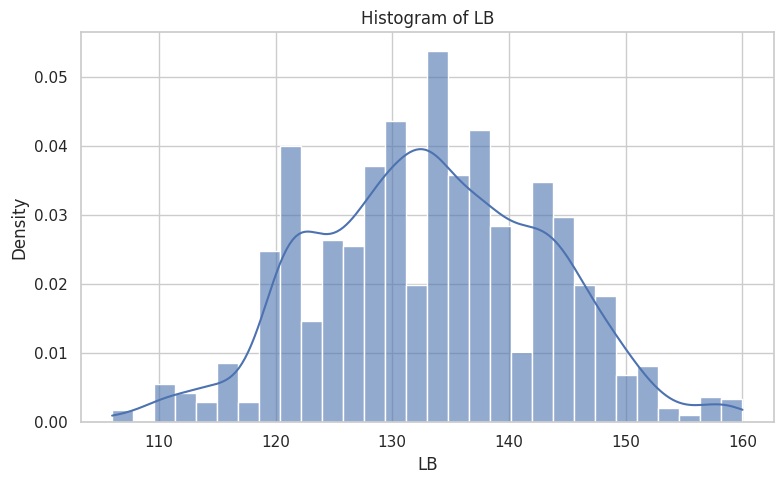

In [10]:
# Histograma de una variable numérica (ajusta el nombre según tu dataset)
plots.plot_histogram_with_kde(
    df_imputed,
    column="LB",
    hue=None,
    bins=30,
    kde=True,
)

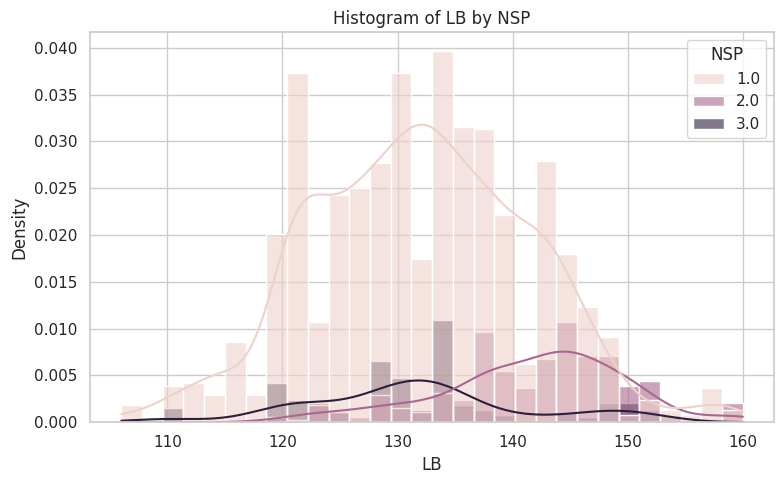

In [11]:
# O por clase
plots.plot_histogram_with_kde(
    df_imputed,
    column="LB",
    hue="NSP",
    bins=30,
    kde=True,
)


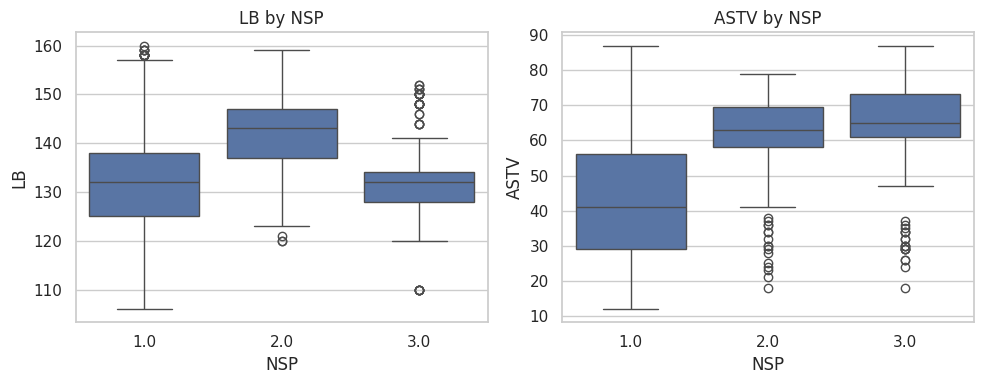

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


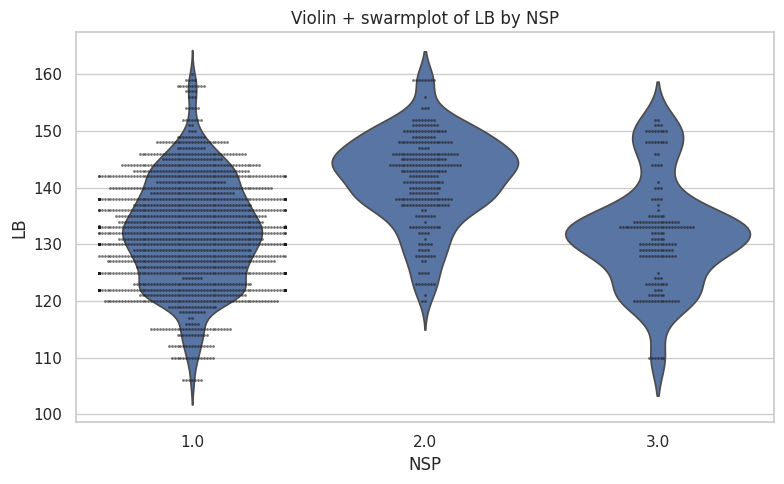

In [21]:
# Boxplots de varias columnas numéricas por clase
plots.plot_box_by_target(
    df_imputed,
    columns=["LB", "ASTV"],   # elige 2-4 columnas numéricas
    target="NSP",
    n_cols=2,
)

# Gráfico de violín + swarmplot para una columna numérica
plots.plot_violin_with_swarm(
    df_imputed,
    column="LB",
    target="NSP",
)


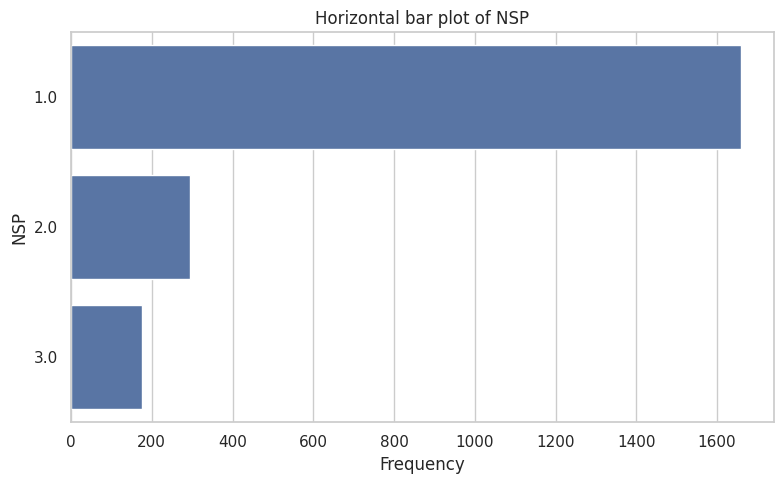

In [13]:
# Gráfico de barras horizontales de la variable objetivo
plots.plot_horizontal_bar(
    df_imputed,
    column="NSP",   # ajusta si tu clase se llama diferente
)


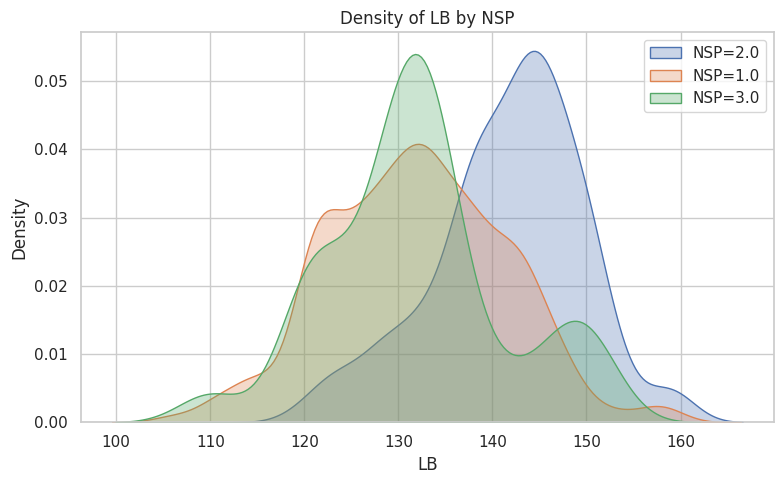

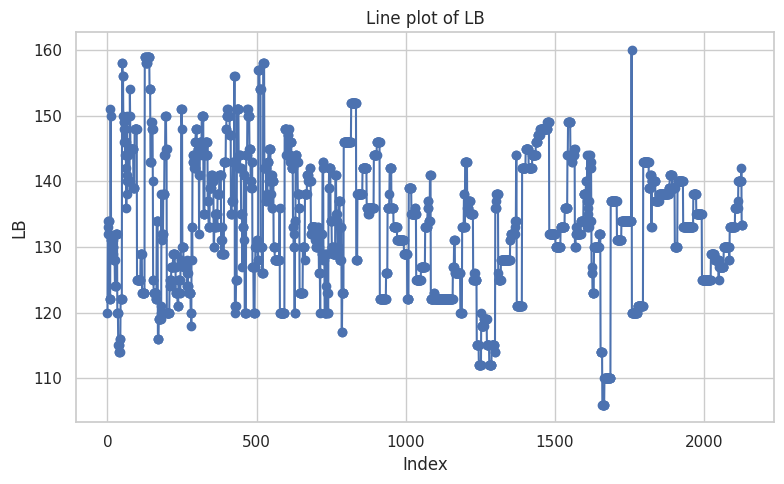

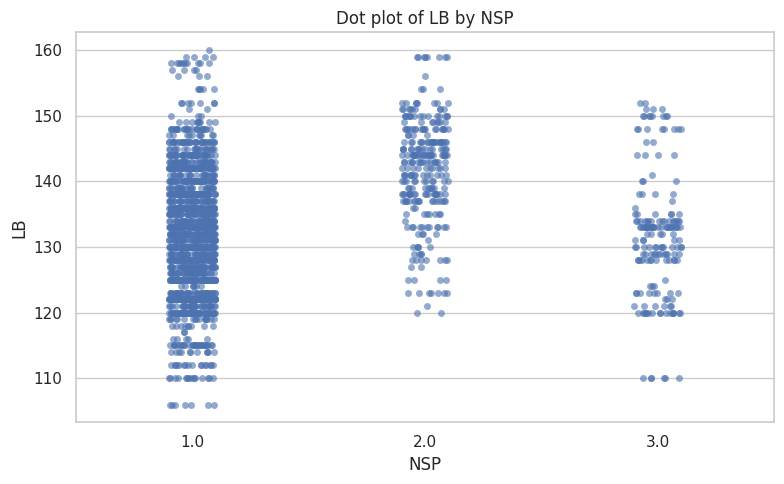

In [14]:
# Densidad por clase
plots.plot_density_by_class(
    df_imputed,
    column="LB",
    target="NSP",
)

# Gráfico de líneas simple (puede ser sobre índice o alguna columna ordenadora)
plots.plot_line_series(
    df_imputed,
    column="LB",
    sort_by=None,
)

# Dot plot (stripplot) comparando distribución entre clases
plots.plot_dot_comparison(
    df_imputed,
    column="LB",
    group="NSP",
)


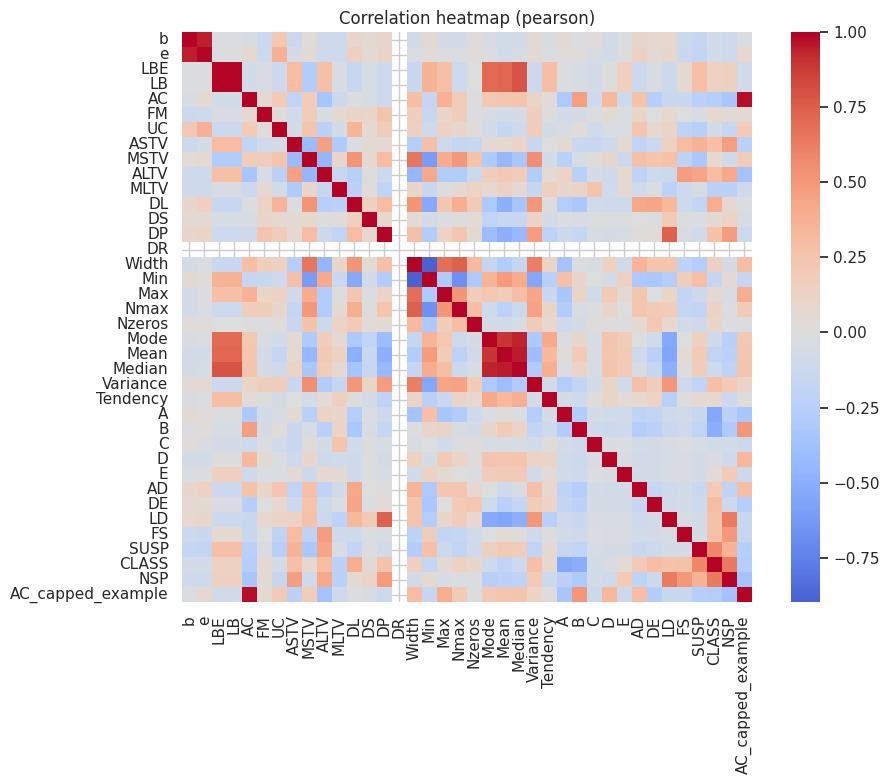

In [15]:
plots.plot_correlation_heatmap(
    df_imputed,
    method="pearson",   # puedes probar también "spearman"
)

## 5. Comentarios y conclusiones

En esta sección se resumen los hallazgos principales del análisis:

- **Calidad de los datos**:  
  - Columnas eliminadas por alto porcentaje de nulos.
  - Resultado de la tabla de completitud.

- **Distribuciones**:
  - Comentarios sobre la forma de las distribuciones (sesgo, simetría).
  - Comparación entre clases en histogramas, boxplots y violines.

- **Relaciones entre variables**:
  - Correlaciones más altas (positivas y negativas) observadas en el heatmap.
  - Posibles variables relevantes para modelado futuro.

- **Outliers**:
  - Cantidad de outliers detectados (IQR / Z-score) en alguna variable clave.
  - Decisión sobre si se capearon o no, y por qué.



In [17]:
df.columns


Index(['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC',
       'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min',
       'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance',
       'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP',
       'CLASS', 'NSP'],
      dtype='object')

In [18]:
df_reduced.columns

Index(['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC',
       'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min',
       'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance',
       'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP',
       'CLASS', 'NSP'],
      dtype='object')

In [19]:
summary.head(20)


,null_count,completeness,dtype,variable_type,stat_mean,stat_median,stat_std,stat_min,stat_max
column,,,,,,,,,
FileName,0,1.0,object,non-numeric,NaN,NaN,NaN,NaN,NaN
Date,0,1.0,object,non-numeric,NaN,NaN,NaN,NaN,NaN
SegFile,0,1.0,object,non-numeric,NaN,NaN,NaN,NaN,NaN
b,0,1.0,float64,continuous,878.439793,538.0,893.454296,0.0,3296.0
e,0,1.0,float64,continuous,1702.877234,1244.0,930.262718,287.0,3599.0
LBE,0,1.0,float64,continuous,133.303857,133.0,9.833905,106.0,160.0
LB,0,1.0,float64,continuous,133.303857,133.0,9.833905,106.0,160.0
AC,0,1.0,float64,continuous,2.720056,1.0,3.558926,0.0,26.0
FM,0,1.0,float64,continuous,7.496008,0.0,39.012784,0.0,564.0
